In [ ]:
!pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ----------------- ---------------------- 7.1/16.4 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 47.0 MB/s eta 0:00:00


In [2]:
!pip install pandas matplotlib seaborn

In [33]:
import mysql.connector

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
try:
    # Ruta al archivo CSV
    ruta_csv = r"C:\Users\ingri\ProjecteData\Equip_16\Data\banca_22.09_dataset.csv"

    # Cargar el CSV en un DataFrame
    df_bank = pd.read_csv(ruta_csv, sep=',', encoding='utf-8')  # usa sep="," si el separador es coma

    print("✅ CSV cargado correctamente.")
    print(df_bank.head())

    # Guardar copia en otra ruta (si querés exportarlo)
    df_bank.to_csv(r"D:\Trabajo\Especializacion DATA - BA\Salva\dataset_23092025.csv", index=False)
    print("✅ CSV guardado correctamente.")

except Exception as e:
    print(f"❌ Error al trabajar con el CSV: {e}")


✅ CSV cargado correctamente.
   id   age         job  marital  education default  balance housing loan  \
0   1  59.0      admin.  married  secondary      no     2343     yes   no   
1   2  56.0      admin.  married  secondary      no       45      no   no   
2   3  41.0  technician  married  secondary      no     1270     yes   no   
3   4  55.0    services  married  secondary      no     2476     yes   no   
4   5  54.0      admin.  married   tertiary      no      184      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may      1042         1     -1         0  unknown     yes   
1  unknown    5   may      1467         1     -1         0  unknown     yes   
2  unknown    5   may      1389         1     -1         0  unknown     yes   
3  unknown    5   may       579         1     -1         0  unknown     yes   
4  unknown    5   may       673         2     -1         0  unknown     yes   

  Clase de edad           Perfil 

In [42]:
df_bank.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit', 'Clase de edad', 'Perfil'],
      dtype='object')

Ino general del dataset

In [43]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16162 entries, 0 to 16161
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16162 non-null  int64  
 1   age            16162 non-null  float64
 2   job            16162 non-null  object 
 3   marital        16162 non-null  object 
 4   education      16162 non-null  object 
 5   default        16162 non-null  object 
 6   balance        16162 non-null  int64  
 7   housing        16162 non-null  object 
 8   loan           16162 non-null  object 
 9   contact        16162 non-null  object 
 10  day            16162 non-null  int64  
 11  month          16162 non-null  object 
 12  duration       16162 non-null  int64  
 13  campaign       16162 non-null  int64  
 14  pdays          16162 non-null  int64  
 15  previous       16162 non-null  int64  
 16  poutcome       16162 non-null  object 
 17  deposit        16162 non-null  object 
 18  Clase 

In [44]:
df_bank.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,16162.000000,16162.000000,16162.000000,16162.000000,16162.000000,16162.000000,16162.000000,16162.000000
mean,9696.708514,41.219404,1508.930145,15.655179,374.047828,2.507920,51.833622,0.838634
std,6754.510024,11.929345,3164.890905,8.419355,348.998499,2.704005,109.846083,2.327033
min,1.000000,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,4041.250000,32.000000,121.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,8081.500000,39.000000,544.000000,15.000000,256.000000,2.000000,-1.000000,0.000000
75%,17342.750000,49.000000,1697.000000,22.000000,500.000000,3.000000,34.750000,1.000000
max,21383.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [45]:
# Resumen de variables categóricas
df_bank.describe(include=['object'])


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,Clase de edad,Perfil
count,16162,16162,16162,16162,16162,16162,16162,16162,16162,16162,16162,16162
unique,12,3,4,2,2,2,3,12,4,2,6,4
top,management,married,secondary,no,no,no,cellular,may,unknown,no,25-34,Millenials
freq,3729,9192,7910,15921,8548,14043,11677,4075,12038,8465,5263,5263


In [46]:
# Seleccionar columnas relevantes
df = df_bank[['id', 'balance', 'loan', 'housing', 'default', 'deposit']].copy()

# Convertir a minúsculas y quitar espacios
df['loan'] = df['loan'].str.strip().str.lower()
df['housing'] = df['housing'].str.strip().str.lower()
df['default'] = df['default'].str.strip().str.lower()
df['deposit'] = df['deposit'].str.strip().str.lower()

# Mapear a 1/0
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

df.describe()

,id,balance,loan,housing,default,deposit
count,16162.000000,16162.000000,16162.000000,16162.000000,16162.000000,16162.000000
mean,9696.708514,1508.930145,0.131110,0.471105,0.014912,0.476241
std,6754.510024,3164.890905,0.337531,0.499180,0.121203,0.499451
min,1.000000,-6847.000000,0.000000,0.000000,0.000000,0.000000
25%,4041.250000,121.000000,0.000000,0.000000,0.000000,0.000000
50%,8081.500000,544.000000,0.000000,0.000000,0.000000,0.000000
75%,17342.750000,1697.000000,0.000000,1.000000,0.000000,1.000000
max,21383.000000,81204.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# Crear grupos combinando loan y housing
df['grupo'] = df['loan'].astype(str) + df['housing'].astype(str)

# Estadisticas básicas y tasa de incumplimiento por grupo
resumen = df.groupby('grupo').agg(
    Saldo_Min=('balance', 'min'),
    Saldo_50=('balance', 'median'),
    Saldo_Max=('balance', 'max'),
    Saldo_Medio=('balance', 'mean'),
    Tasa_Incumplimiento=('default', 'mean')
).reset_index()

# Nombres descriptivos en el resumen
nombre_grupo = {
    '00': 'Ni préstamo, ni hipoteca',
    '01': 'Sólo hipoteca',
    '10': 'Sólo préstamo',
    '11': 'Con préstamo e hipoteca'
}
resumen['Nombre_Grupo'] = resumen['grupo'].map(nombre_grupo)

#Visualizacion
resumen['Tasa_Incumplimiento'] = (resumen['Tasa_Incumplimiento'] * 100).round(2)
resumen[['Saldo_Min', 'Saldo_50', 'Saldo_Max', 'Saldo_Medio']] = resumen[['Saldo_Min', 'Saldo_50', 'Saldo_Max', 'Saldo_Medio']].round(2)
resumen = resumen[[ 'Nombre_Grupo', 'grupo', 'Saldo_Min', 'Saldo_50', 'Saldo_Max', 'Saldo_Medio', 'Tasa_Incumplimiento']]

resumen

,Nombre_Grupo,grupo,Saldo_Min,Saldo_50,Saldo_Max,Saldo_Medio,Tasa_Incumplimiento
0,"Ni préstamo, ni hipoteca",00,-1415,689.0,81204,1851.62,0.83
1,Sólo hipoteca,01,-2049,499.0,45248,1327.65,1.45
2,Sólo préstamo,10,-6847,276.0,51439,899.02,5.03
3,Con préstamo e hipoteca,11,-3058,291.0,34230,764.69,3.24


In [48]:
#Calcular datos generales
general = pd.DataFrame({
    'Nombre_Grupo': ['General'],
    'grupo': ['--'],
    'Saldo_Min': [df['balance'].min()],
    'Saldo_50': [df['balance'].median()],
    'Saldo_Max': [df['balance'].max()],
    'Saldo_Medio': [round(df['balance'].mean(), 2)],
    'Tasa_Incumplimiento': [round(df['default'].mean()*100, 2)]
})

# Unir resumen  con la fila general
resumen = pd.concat([resumen, general], ignore_index=True)

resumen


,Nombre_Grupo,grupo,Saldo_Min,Saldo_50,Saldo_Max,Saldo_Medio,Tasa_Incumplimiento
0,"Ni préstamo, ni hipoteca",00,-1415,689.0,81204,1851.62,0.83
1,Sólo hipoteca,01,-2049,499.0,45248,1327.65,1.45
2,Sólo préstamo,10,-6847,276.0,51439,899.02,5.03
3,Con préstamo e hipoteca,11,-3058,291.0,34230,764.69,3.24
4,General,--,-6847,544.0,81204,1508.93,1.49


# **1. Saldos**

Resumen general
- Todos los grupos presentan **sesgo positivo**, es decir, la **media supera la mediana**.  
- Este patrón se mantiene en consonancia con el comportamiento general de toda la población, reflejando la presencia de **valores extremos que elevan la media**.

Hallazgos por grupo

- **Ni préstamo ni hipoteca:**  
  - Gran dispersión de saldos (mínimo muy bajo, máximo muy alto).  
  - Media y mediana más altas que el promedio general.

- **Sólo hipoteca:**  
  - Mediana y media por encima del promedio general, siendo las segundas más altas.  
  - Grupo heterogéneo: algunos clientes con saldo elevado, pero la mayoría mantiene saldos moderados.

- **Sólo préstamo:**  
  - Mediana más baja que la de todos los grupos (excepto “Con préstamo e hipoteca”).  
  - Segunda media más baja.  
  - Rango amplio de saldos, incluyendo valores negativos.  
  - Indica que tener un préstamo se asocia con **menores saldos líquidos** y mayor concentración de clientes con bajos balances.

- **Con préstamo e hipoteca:**  
  - **Rango más reducido** entre mínimo y máximo.  
  - Saldo máximo más bajo que otros grupos, reflejando menor presencia de valores extremos altos.  
  - Media y mediana bajas: clientes con menor liquidez disponible.  
  - Es el grupo con los saldos más acotados y las medias más bajas, destacando frente a los otros grupos.

Conclusión sobre saldos
- Los grupos con préstamos, especialmente **“Con préstamo e hipoteca”**, muestran menor liquidez y rangos más acotados.  
- La relación entre tener préstamos/hipotecas y los saldos es evidente, con patrones de media y mediana que reflejan diferencias claras entre los grupos.

---

# **2. Riesgo de Incumplimiento**

Datos generales
- La **tasa general de incumplimiento** es muy baja (aprox. 1.5%), indicando que la mayoría de clientes cumple con sus obligaciones.

Hallazgos por grupo

- **Ni préstamo ni hipoteca:**  
  - Tasa de incumplimiento extremadamente baja (cercana a 0%).  

- **Sólo hipoteca:**  
  - Tasa ligeramente superior al grupo sin préstamos (~1.4%).  

- **Sólo préstamo:**  
  - Tasa más alta que los anteriores (~5%).  
  - Los clientes con préstamos muestran **mayor propensión al incumplimiento**.

- **Con préstamo e hipoteca:**  
  - Tasa intermedia (~3.2%), menor que el grupo “sólo préstamo” pero mayor que los grupos sin préstamos.  
  - Aunque estos clientes tienen menor liquidez, el riesgo relativo de impago no es el más alto.

Conclusión sobre riesgo
- El **préstamo** es el factor que más se asocia a un mayor riesgo de incumplimiento. 
- Con préstamo: tener hipoteca reduce el riesgo observado comparado con no tener hipoteca.
- Sin préstamo: tener hipoteca aumenta ligeramente el riesgo.
- Esto indica interacción entre variables, es decir, el efecto de Housing sobre el riesgo depende de si hay Loan o no.

Score de riesgo

- La fórmula actual del Score de Riesgo requiere ajuste, ya que el préstamo y la hipoteca no contribuyen de igual manera al riesgo de incumplimiento. El análisis ha demostrado que el préstamo tiene un impacto considerablemente mayor sobre el incumplimiento que la hipoteca.
- La fórmula actual trata a Housing como un factor de reducción de riesgo de manera uniforme.Esto no captura el patrón observado, porque la dirección del efecto de Housing cambia según Loan.
- Se mantienen los pesos asociados al saldo (Balance) y al historial de incumplimiento (Default), ya que siguen siendo variables clave en la predicción del riesgo.


Tras el análisis descriptivo por segmentos, se observaron patrones claros de riesgo según la combinación de productos financieros (Loan y Housing). Para confirmar que estos patrones no eran casuales, se opta por aplicar modelos de regresión logística, apropiado para variables dependientes binarias (default/no default), que permite:

- Cuantificar efectos independientes manteniendo las demás variables constantes. Así, se puede estimar el efecto de Loan sobre el riesgo de incumplimiento mientras se controla Housing y Deposit, y viceversa, identificando predictores robustos y moduladores.
- Evaluar interacciones entre variables. Por ejemplo, Housing puede tener un efecto diferente dependiendo de si el cliente tiene Loan. La regresión permite medir este efecto combinado de manera estadísticamente significativa.
- Incluir Deposit como tercer producto financiero considerado en el Score de riesgo. Esto permite evaluar si el efecto de Housing podría explicarse parcialmente por la presencia de otro producto financiero y asegurar que el Score refleje la evidencia estadística real.
- En resumen, la regresión logística confirma la relevancia estadística de los efectos observados, cuantifica interacciones y controla variables simultáneamente, garantizando que el Score de riesgo se base en evidencia sólida y coherente con la estrategia bancaria.

In [91]:
# Modelo con productos financieros
model1 = smf.logit("default ~ loan + housing + deposit", data=df).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.074705
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                16162
Model:                          Logit   Df Residuals:                    16158
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                 0.03621
Time:                        15:50:15   Log-Likelihood:                -1207.4
converged:                       True   LL-Null:                       -1252.7
Covariance Type:            nonrobust   LLR p-value:                 1.533e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3677      0.123    -35.394      0.000      -4.610      -4.126
loan           1.2351      0.138      8.919      0.000       0.964       1.507
housing        0.1478      0.133      1.112      0.266      -0.113       0.408
deposit       -0.4384      0.141     -3.120      0.002      -0.714      -0.163
==============================================================================
"""

In [86]:
# Función para obtener OR y p-value 
def or_pvalue(model, alpha=0.05):
    df_temp = pd.DataFrame({
        "Variable": model.params.index,
        "Odds Ratio": np.exp(model.params.values).round(3),
        "p-value": model.pvalues.values
    })
    df_temp["Significativo"] = df_temp["p-value"].apply(lambda x: "Sí" if x < alpha else "No")
    return df_temp

tabla1 = or_pvalue(model1)
tabla1


,Variable,Odds Ratio,p-value,Significativo
0,Intercept,0.013,2.116102e-274,Sí
1,loan,3.439,4.684820e-19,Sí
2,housing,1.159,2.659878e-01,No
3,deposit,0.645,1.807633e-03,Sí


- Loan domina el riesgo 
- Deposit protege (con menor peso)
- Housing efecto débil y estadisticamente no significativo

In [87]:
# Modelo con interacción loan:housing
model2 = smf.logit("default ~ loan + housing + loan:housing", data=df).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.074584
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                16162
Model:                          Logit   Df Residuals:                    16158
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                 0.03778
Time:                        15:45:09   Log-Likelihood:                -1205.4
converged:                       True   LL-Null:                       -1252.7
Covariance Type:            nonrobust   LLR p-value:                 2.201e-20
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.7889      0.127    -37.854      0.000      -5.037      -4.541
loan             1.8514      0.197      9.387      0.000       1.465       2.238
housing          0.5707      0.164      3.479      0.001       0.249       0.892
loan:housing    -1.0309      0.276     -3.732      0.000      -1.572      -0.490
================================================================================
"""

In [88]:
tabla2 = or_pvalue(model2)
tabla2

,Variable,Odds Ratio,p-value,Significativo
0,Intercept,0.008,0.000000e+00,Sí
1,loan,6.369,6.150346e-21,Sí
2,housing,1.770,5.040387e-04,Sí
3,loan:housing,0.357,1.899222e-04,Sí


- Loan sigue siendo el predictor principal
- La interacción negativa indica que Housing reduce riesgo solo si hay Loan. Esto respalda asignar un peso condicional a Housing.


In [89]:
# Modelo con interacción loan:housing y deposit
model3 = smf.logit("default ~ loan + housing + loan:housing + deposit", data=df).fit()
model3.summary()


Optimization terminated successfully.
         Current function value: 0.074333
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                16162
Model:                          Logit   Df Residuals:                    16157
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                 0.04101
Time:                        15:45:09   Log-Likelihood:                -1201.4
converged:                       True   LL-Null:                       -1252.7
Covariance Type:            nonrobust   LLR p-value:                 2.556e-21
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.5726      0.145    -31.568      0.000      -4.857      -4.289
loan             1.7601      0.200      8.811      0.000       1.369       2.152
housing          0.4865      0.167      2.919      0.004       0.160       0.813
loan:housing    -0.9591      0.277     -3.457      0.001      -1.503      -0.415
deposit         -0.3942      0.141     -2.799      0.005      -0.670      -0.118
================================================================================
"""

In [90]:
tabla3 = or_pvalue(model3)
tabla3

,Variable,Odds Ratio,p-value,Significativo
0,Intercept,0.010,1.011876e-218,Sí
1,loan,5.813,1.239823e-18,Sí
2,housing,1.627,3.512503e-03,Sí
3,loan:housing,0.383,5.469935e-04,Sí
4,deposit,0.674,5.118649e-03,Sí


- Loan se consolida como el predictor principal.
- Deposit protege de manera consistente.
- Housing modula riesgo solo si hay Loan.

Teniendo en cuenta todo esto:
- La reasignacion de peso Loan (20%) > Deposit(10%) > Housing(5%) es coherente con los OR y la significancia estadística.
- Deposit tiene más peso que Housing porque su efecto protector es consistente y Housing solo actúa bajo interacción.
- Housing solo aplica efecto protector si hay Loan


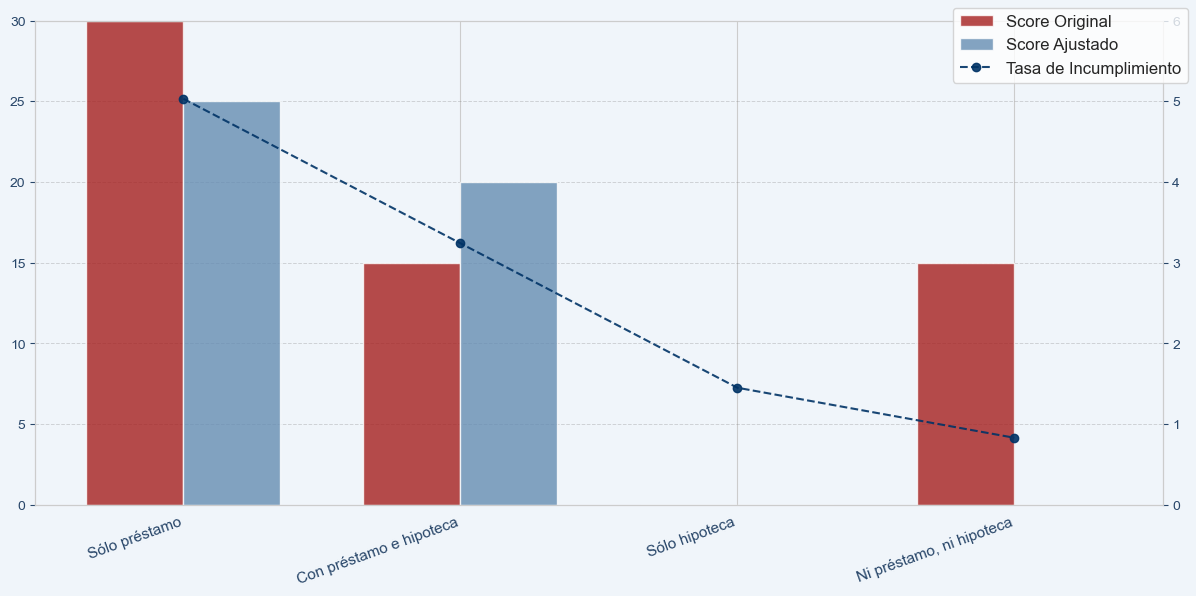

In [114]:
# Datos
data = {
    "Grupo": ["Sólo préstamo", "Con préstamo e hipoteca", "Sólo hipoteca", "Ni préstamo, ni hipoteca"],
    "Score_Original": [30, 15, 0, 15],
    "Score_Ajustado": [25, 20, 0, 0],
    "Tasa_Incumplimiento": [5.03, 3.24, 1.45, 0.83]
}

df = pd.DataFrame(data)

# Posiciones
x = np.arange(len(df["Grupo"]))
width = 0.35

# Figura y tamaño
fig, ax1 = plt.subplots(figsize=(12,6))
fig.patch.set_facecolor('#f0f5fa')  # fondo de la figura
ax1.set_facecolor('#f0f5fa')        # fondo del área de barras

# Barras con transparencia
ax1.bar(x - width/2, df["Score_Original"], width, label="Score Original", color="#a51f1e", alpha=0.8)
ax1.bar(x + width/2, df["Score_Ajustado"], width, label="Score Ajustado", color="#658db2", alpha=0.8)
ax1.set_xticks(x)
ax1.set_xticklabels(df["Grupo"], rotation=20, ha="right", color="#284669", fontsize=11)
ax1.tick_params(axis='y', colors="#284669")
ax1.set_ylim(0, 30)
ax1.grid(axis='y', linestyle='--', color='gray', alpha=0.3, linewidth=0.7)

# Eje derecho para Tasa de Incumplimiento
ax2 = ax1.twinx()
ax2.set_facecolor('#f0f5fa')
ax2.plot(x, df["Tasa_Incumplimiento"], color="#003366", marker="o", linestyle="--", label="Tasa de Incumplimiento", alpha=0.9)
ax2.tick_params(axis='y', colors="#284669")
ax2.set_ylim(0, 6)
ax2.grid(False)

# Leyenda combinada y más grande
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()
